In [1]:
import os

import numpy as np
np.set_printoptions(precision=2)
import torch
import matplotlib.pyplot as plt

from bmadx import Particle
from bmadx.plot import plot_projections

from stats import (
    read_all_particles,
    show_cov_stats,
    plot_projections_with_contours
)

In [2]:
dr = os.path.join('data', 'gaussian_beam', 't_scan')

In [3]:
gt = torch.load(os.path.join(dr, 'gaussian_beam.pt')).numpy_particles()

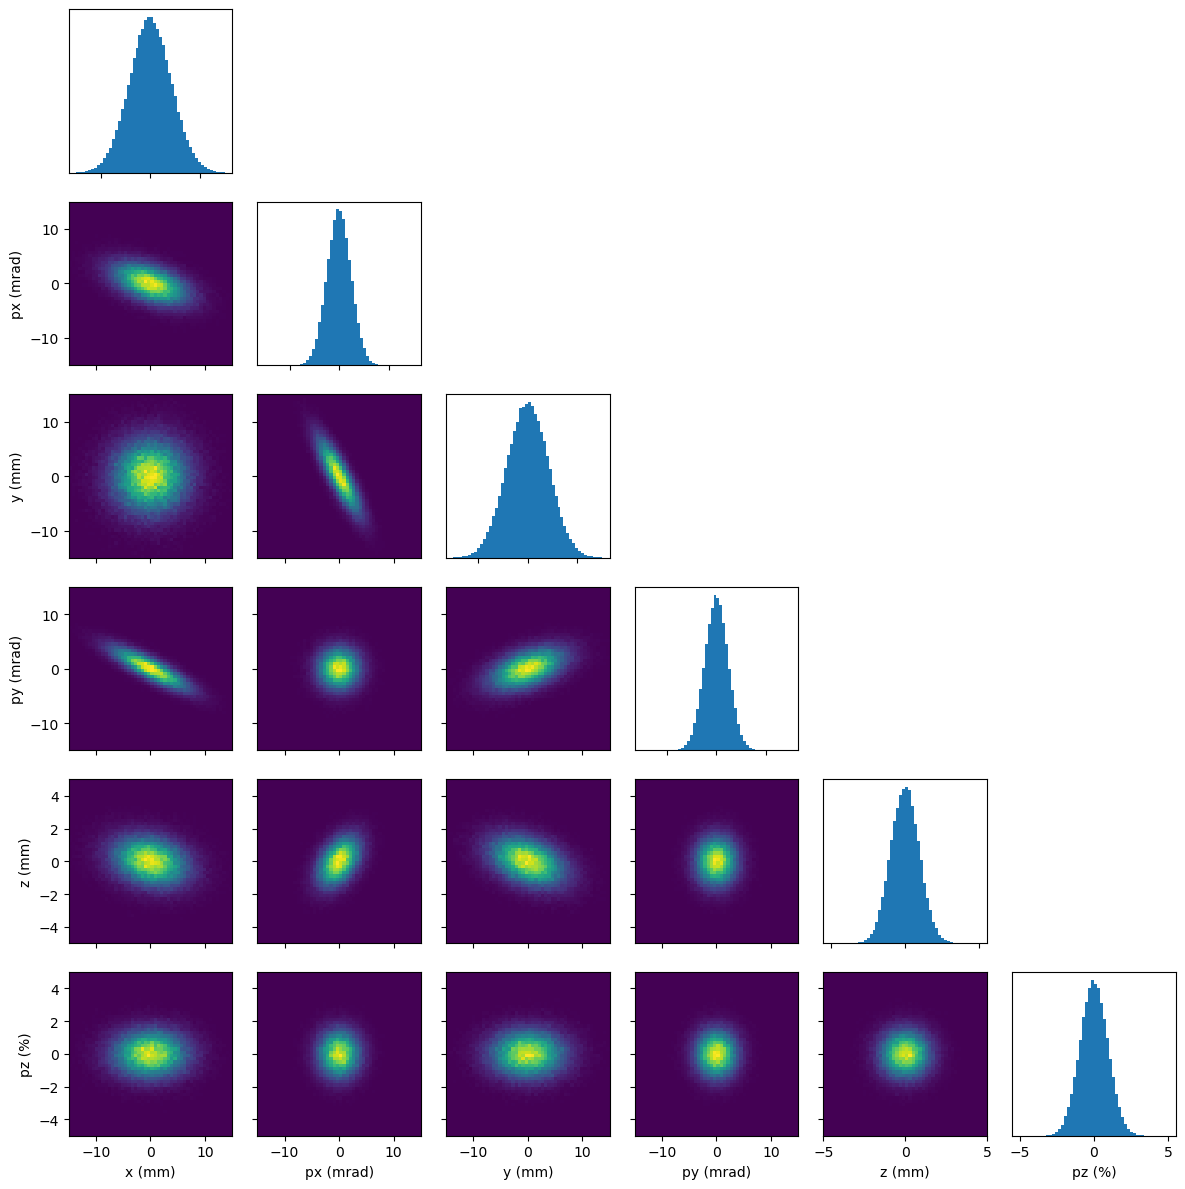

In [4]:
# plot gt:
lims = np.array([
    [-15e-3,15e-3],
    [-15e-3,15e-3],
    [-15e-3,15e-3],
    [-15e-3,15e-3],
    [-5e-3,5e-3],
    [-5e-2,5e-2]
])
plot_projections(gt, custom_lims=lims)
plt.show()

In [5]:
n_beams = 100
n_par = 100_000

pars = read_all_particles(
    dr = dr,
    n_beams = n_beams, 
    n_par = n_par
)

FileNotFoundError: [Errno 2] No such file or directory: 'data/gaussian_beam/t_scan/r_1.pt'

In [ ]:
par_concat = np.swapaxes(pars, 0, 1).reshape((6, n_par*n_beams))

In [ ]:
r_avg = Particle(
    *par_concat,
    p0c = gt.p0c,
    s = gt.s,
    mc2 = gt.mc2
)

In [ ]:
plot_projections(r_avg, custom_lims=lims)
plt.show()

In [ ]:
plot_projections_with_contours(
    r_avg,
    gt,
    bins=200,
    contour_percentiles = [50, 95],
    custom_lims=lims,
    contour_smoothing_r=0.5,
    contour_smoothing_gt=0.5
)
plt.show()

In [ ]:
show_cov_stats(pars, gt, beam_fraction=0.5)

In [ ]:
show_cov_stats(pars, gt, beam_fraction=0.95)

In [ ]:
np.set_printoptions(precision=2, suppress=True)
show_cov_stats(pars, gt, beam_fraction=1.0)